In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler,minmax_scale
from sklearn.neighbors import KNeighborsClassifier
from pickle import load
from Data_preparation_Library import *
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from keras.models import load_model

In [2]:
def filter_arr(arr,order=1,cf=50,fs=2000):
    b,a = signal.butter(1, 50,fs=fs)
    return signal.lfilter(b, a,arr)

In [3]:
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']

In [4]:
model = load_model('models/DTM_400_raw.hdf5')

In [5]:
X = np.load('prepared_data/TEST_EMG_400_DTM.npy')
t = np.load('prepared_data/TEST_EMG_400_DTM_t.npy')

In [6]:
X.shape,t.shape

((271545, 400, 8), (271545,))

In [22]:
duration = 27
window = 400
interval = 1
fs_x = X.shape[0]/duration
print(fs_x,'Hz')

10057.222222222223 Hz


In [23]:
X_new = []
t_new = []
i = 0 
pbar = tqdm(total=len(X))
while i<len(X):
    x = X[i]
    for j in range(x.shape[1]):
        x[:,j] = filter_arr(x[:,j])
    X_new.append(x)
    t_new.append(t[i])
    i = i + interval
    pbar.update(interval)
pbar.close()
X_new = np.array(X_new)
X_new.shape

(271545, 400, 8)

In [24]:
pred = model.predict(X_new)

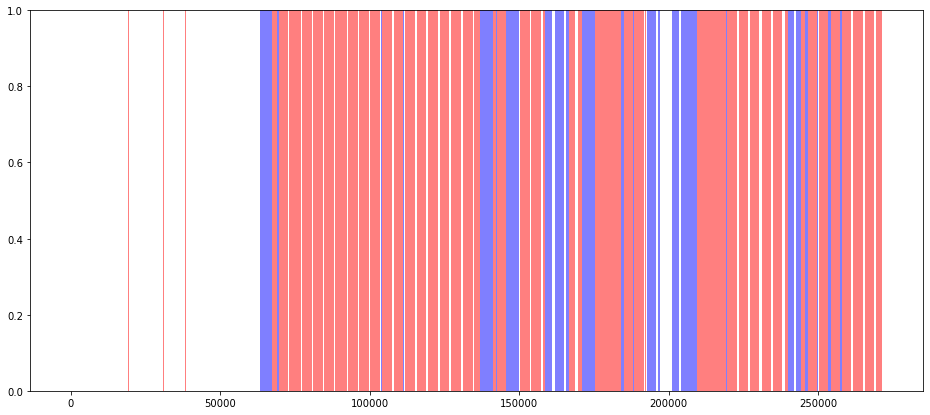

In [25]:
plt.figure(figsize=(16,7))
# plt.xticks(t_new)
i = 0
while i<len(pred):
    cls = pred[i].argmax()
    i = i + 1
    if cls==0:
        plt.axvspan(i,i+1,facecolor= '1', alpha=0.5)
    elif cls==1:
        plt.axvspan(i,i+1,facecolor= 'r', alpha=0.5)
    elif cls==2:
        plt.axvspan(i,i+1,facecolor= 'b', alpha=0.5)
plt.show()

<AxesSubplot:>

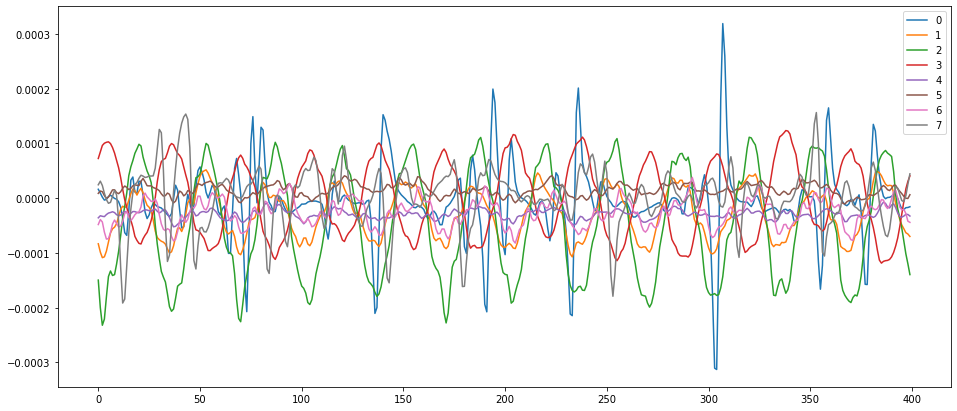

In [62]:
pd.DataFrame(X[0]).plot(figsize=(16,7))

<AxesSubplot:>

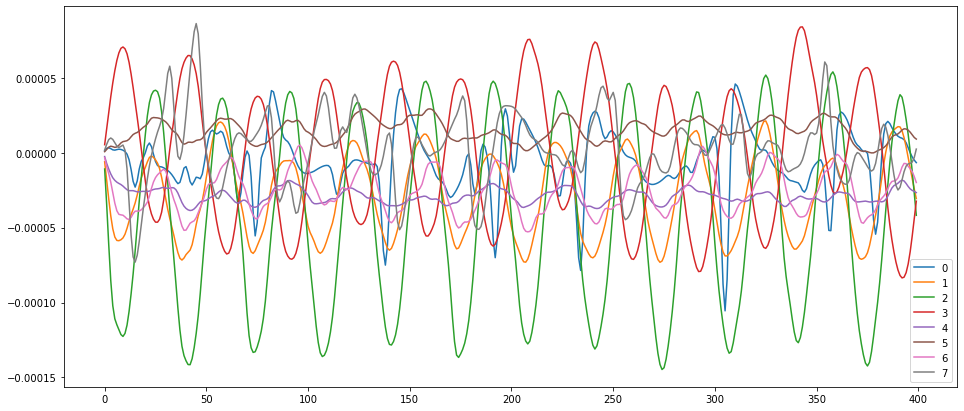

In [66]:
x = X[0]
for i in range(x.shape[1]):
    x[:,i] = filter_arr(x[:,i])
pd.DataFrame(x).plot(figsize=(16,7))